# Artificial Neural Networks

*Alípio Jorge*

May 2021

# Machine learning > how we started?

- The general setup
    - We study an **unknown function** $f(x)=y$ that governs a phenomenon
        - Supervised setting
    - We **observe scattered manifestations** of that phenomenon $<x,y>$
    - We aim at finding a good **approximation** $\hat{f}(x)=\hat{y}$


- **Inductive inference**
    - **Infer a general rule** (function) from observations
    - Assume the **future resembles the past**
    - **Philosophers**
        - David Hume
        - Karl Popper



# Approaches

- **Different ways of learning** the approximate function $f(x)$


- **Assumptions**
    - **Shape** of the function
        - Parameters
    - Data **distribution**


- **Inductive Principle**
    - Empirical Risk Minimization
        - Minimize a **loss function** from observations
    - Structural Risk Minimization
        - Minimize the **complexity** of the model


- **Mathematical methods**
    - Least Squares
        - Loss function is given by sum of squared errors
    - Maximum Likelihood Estimate
        - Choose the parameters that maximize the posterior probability of the target
    - Bayesian Approach
        - Include the variability of the parameters
        - Choose the most likely target value given the observation


- **Algorithmic methods**
    - Analytical derivation
    - Similarity based
    - Search
    - Optimization
        - Quadratic programming

# Logistic Regression (again)

- **We want** a function $f(x)$ that finds $y$ that maximizes $\Pr(y=1|X=x)$
- We **assume** that the probability of $y=1$ depends on a linear combination of $x$

$$
\Pr(y=1|x) \sim t = \beta_0+\beta x
$$

- **And** that $\Pr(y=1|x)$ is a **logistic** function

$$
\Pr(y=1|x) = \frac{e^t}{1+e^t}
$$

- We use **MLE** to find an expresion for $\beta$:

$$
Max_{\beta_0,\beta} Lkl(\beta_0,\beta)=\prod_{i:y_i=class_1} \Pr(y_i=1 | x_i:\beta_0,\beta) \prod_{i:y_i=class_2} (1-\Pr(y_i=1 | x_i:\beta_0,\beta)) 
$$

- **Algorithmically**
    - Use an iterative algorithm (solver) for the maximization (optimization)


# Logistic Regression > the classifier

- $p(x) = logistic(\beta_0 + \beta x)$
    - $f(x)==class_1$ if $p(x) > 0.5$
    - $f(x)==class_2$ if $p(x) \leq 0.5$


- We can represent this classifier as a diagram.

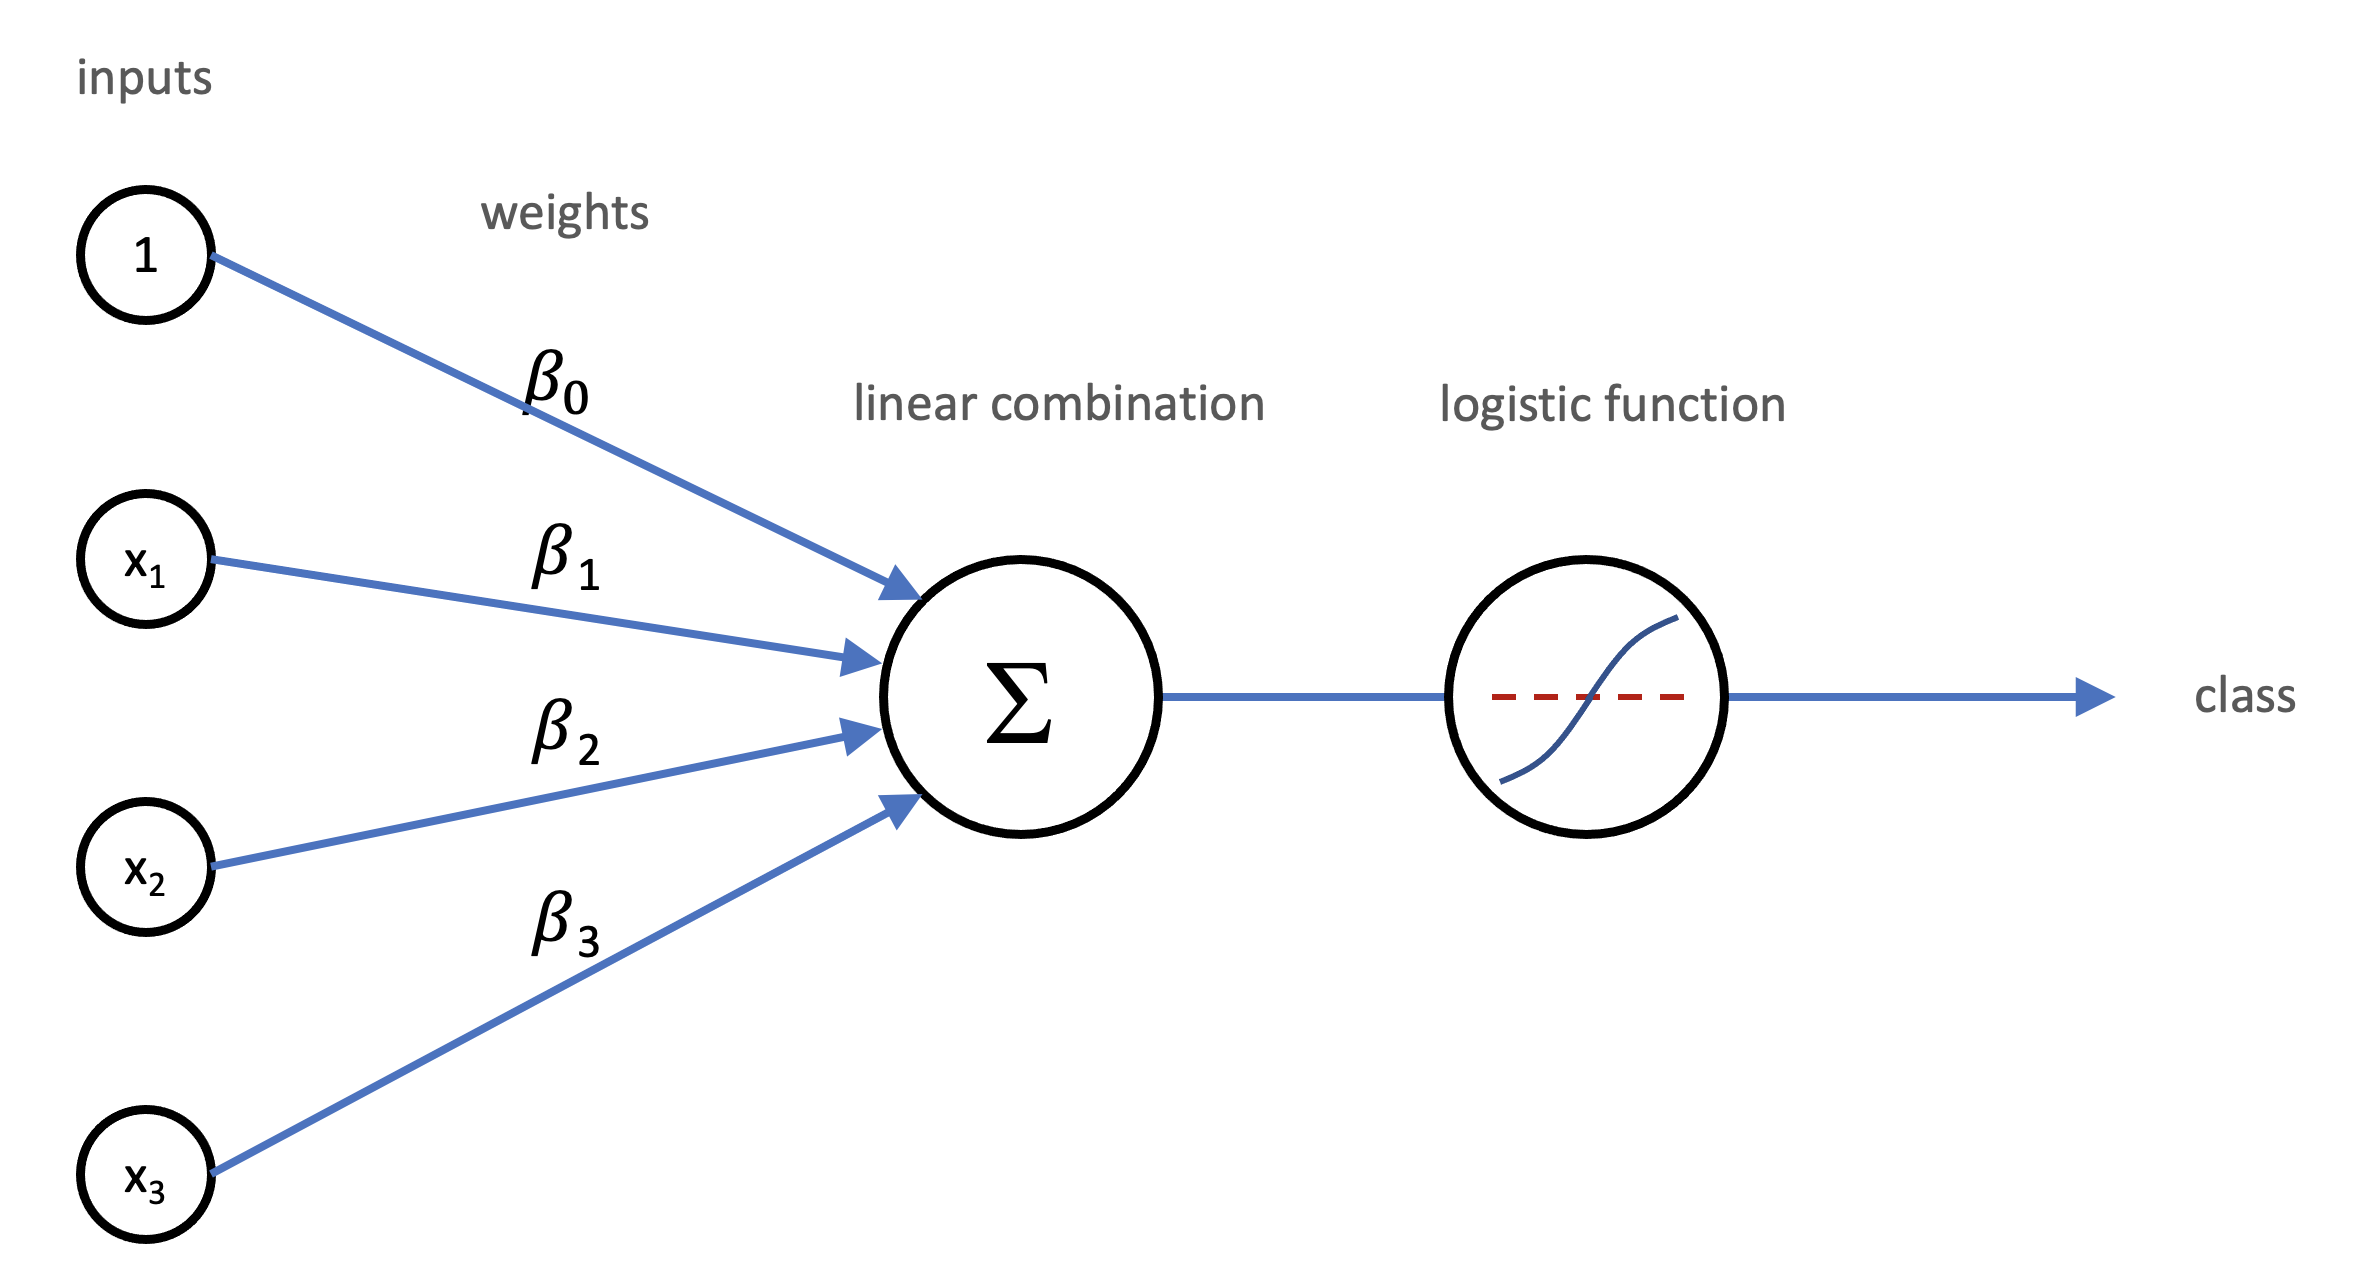

In [522]:
from IPython.display import Image
Image("imagens/9-LogRegAsANN.png")

beta0 = -6.59
beta1 = 1.22
beta2 = 0.14


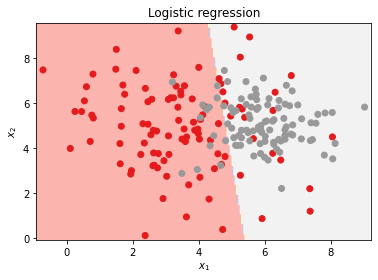

In [523]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

cmap_bg='Pastel1'
cmap_fg='Set1'

def plot_classifier_boundary(model,X,h = .05):
    # this function can be used with any sklearn classifier
    # ready for two classes but can be easily extended
    x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+.2
    y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+.2
    # generate a grid with step h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # the method ravel flattens xx and yy
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_bg)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))
    
n_points=100
std1=2
std2=1

X,y = make_blobs(n_samples=[n_points,n_points], centers=[(3,5),(6,5)], 
                 n_features=2, cluster_std=[std1,std2],
                 random_state=1, shuffle=False)

logr=LogisticRegression().fit(X,y)

plot_classifier_boundary(logr,X)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_fg)
plt.title('Logistic regression')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print("beta0 =", np.round(logr.intercept_[0],2))
print("beta1 =", np.round(logr.coef_[0][0],2))
print("beta2 =", np.round(logr.coef_[0][1],2))

# The Perceptron

- A simple model of a neural decision structure
$$f(x) = I(\sum_{i=0}^n w_i x_i \ge \theta ), \\ z \ge \theta \rightarrow I(z)=1, else~~ I(z)=0$$

- Where $\theta$ is the **threshold** of the step function. $x_0 = 1$ is the **bias**.



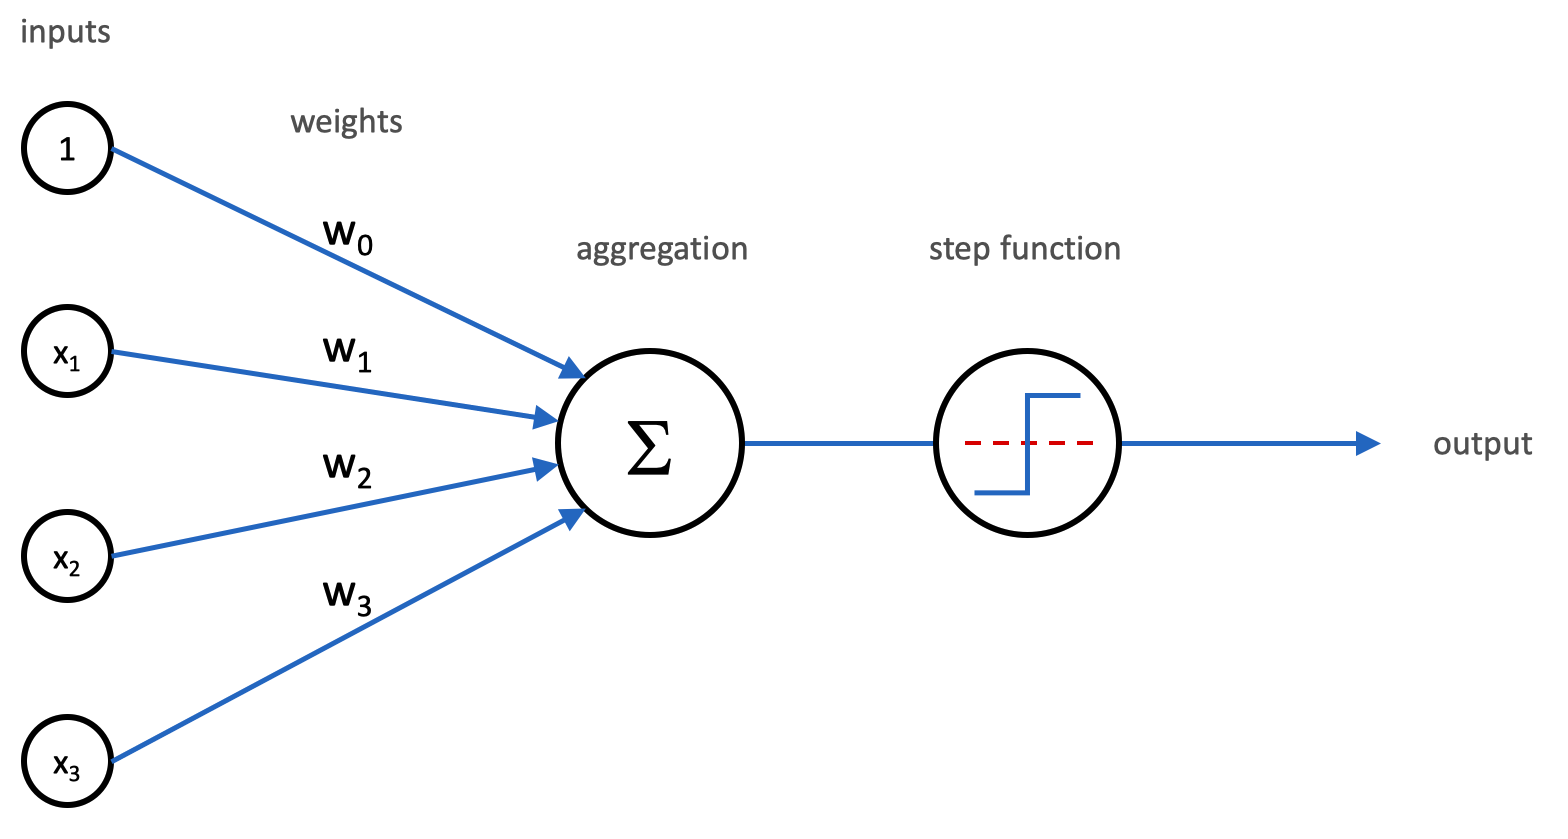

In [524]:
from IPython.display import Image
Image("imagens/11-ANN-perceptron2.png")

# The Perceptron

- A **linear combination** of inputs with a discretized output (or not)
    * input nodes
    * bias weight (indpendent term)
    * linear combination
    * activation function (e.g. step function)
    * decision (class)


- We can see the perceptron as a **generalization** of logistic regression
    - Although they have been developed independently (apparently)
    - The perceptron is inspired on the **structure of a natural brain**

## History of the Artificial Neural Networks

1943, The perceptron is published

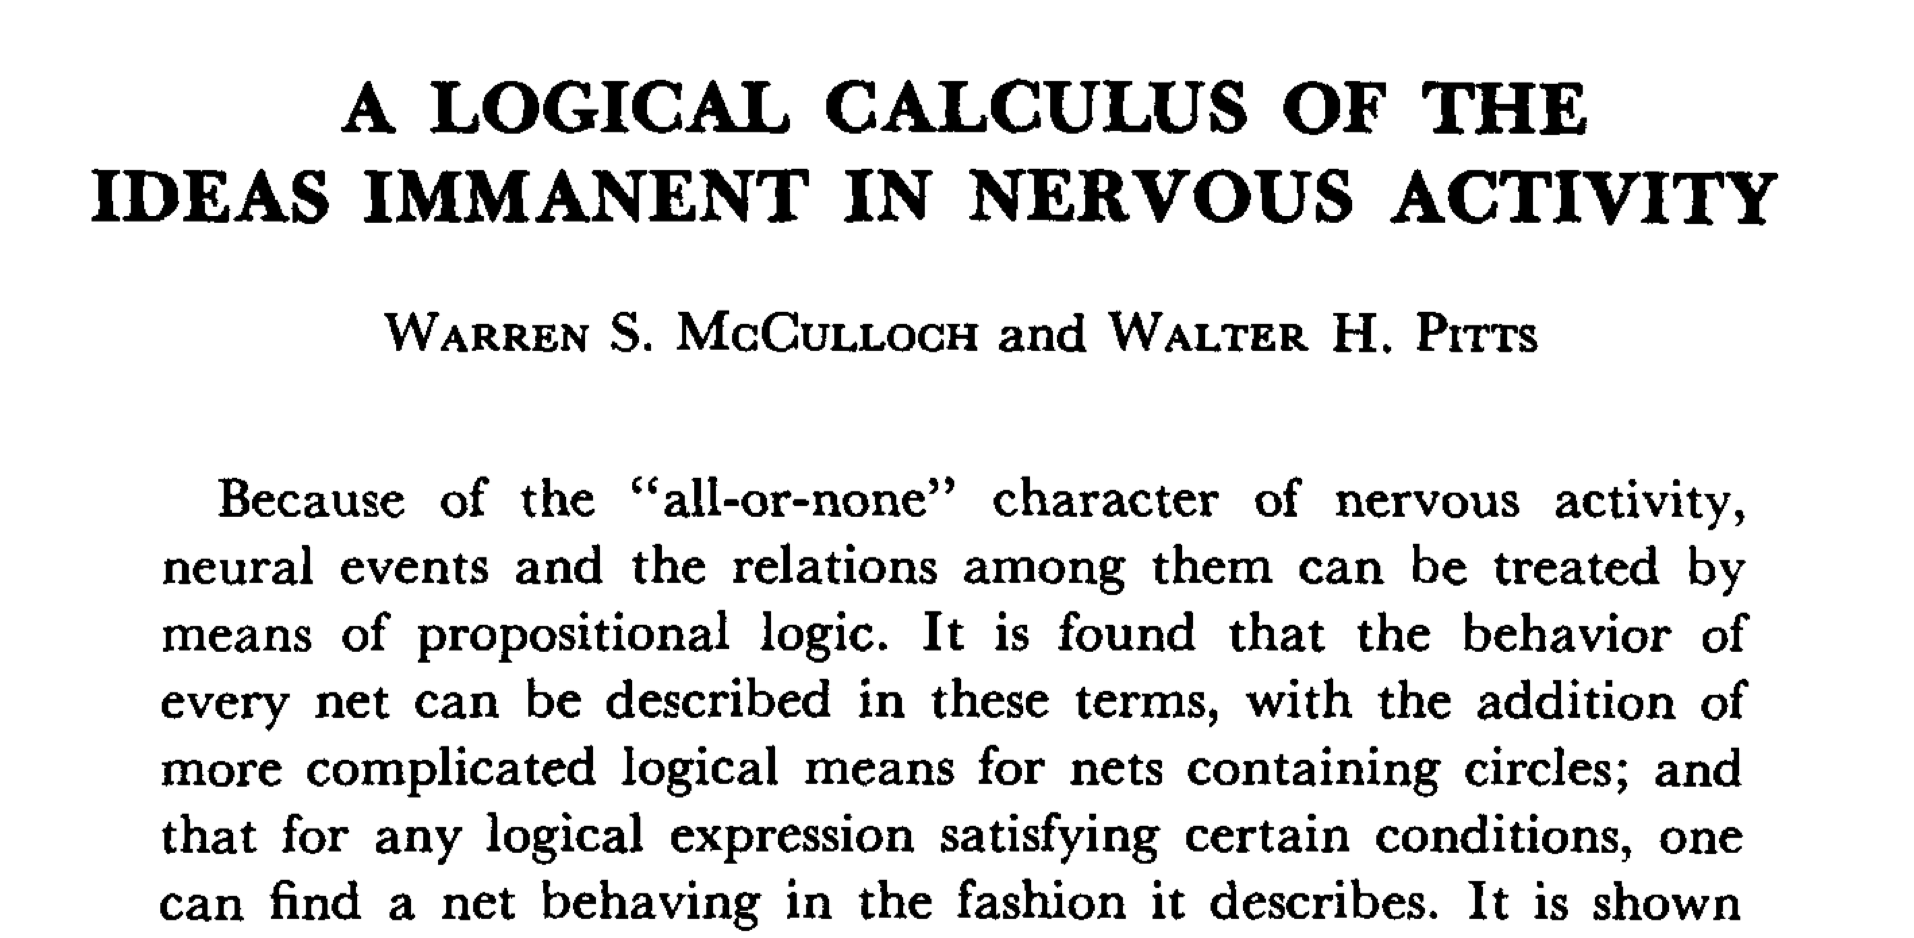

In [525]:
from IPython.display import Image
Image("imagens/11-ANN-paperMP.png")

# Perceptron from sklearn

- Result different to Logistic Regression
    - Different Optimizer
    - Step function

w0 = -5.7
w1 = 1.29
x2 = 0.14


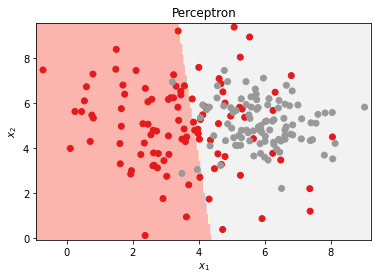

In [526]:
from sklearn.linear_model import Perceptron

    
model=Perceptron(eta0=0.1, tol=0).fit(X,y)

plot_classifier_boundary(model,X)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_fg)
plt.title('Perceptron')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print("w0 =", np.round(model.intercept_[0],2))
print("w1 =", np.round(model.coef_[0][0],2))
print("x2 =", np.round(model.coef_[0][1],2))

# The Perceptron

- How is learning done?
  - learning consists of **estimating values for the weights** $w_i$
  - this implementation is using **Stochastic Gradient Descent**
  - the aim is to **minimize the loss** $max(0,-y_i f(x_i))$



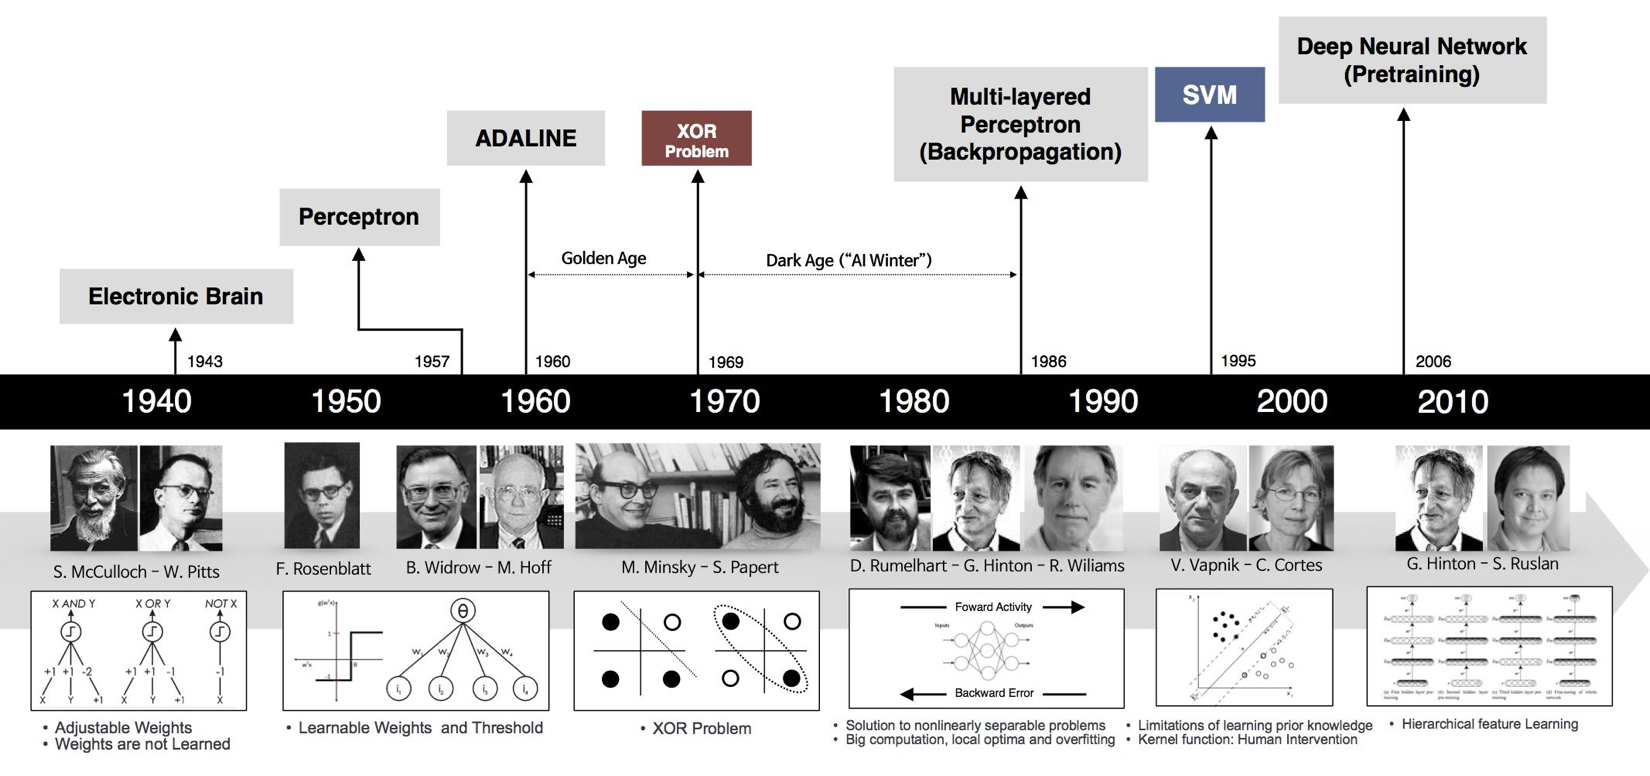

In [527]:
from IPython.display import Image
Image("imagens/11-ANN-timeline.png")

# Neural Networks

- The perceptron can be adapted:
    - Combined in parallel (multioutput)
    - Stacked (multilayer)
    - Use other activation functions
    - Use different optimizers
    - Use different "wirings"
    - And many other tricks


- ANN can represent a large number of learnable functions
    - The **most successful** family of ML methods

# The Multi-Layer Perceptron (MLP)

- Commonly known as "Neural Network" or "Artificial Neural Network"
    - Multiple perceptrons side by side on each layer
    - Multiple layers
    - Feedforward network: values are processed from left to right


- Learning
    - Find good values for the **parameters** (weights)


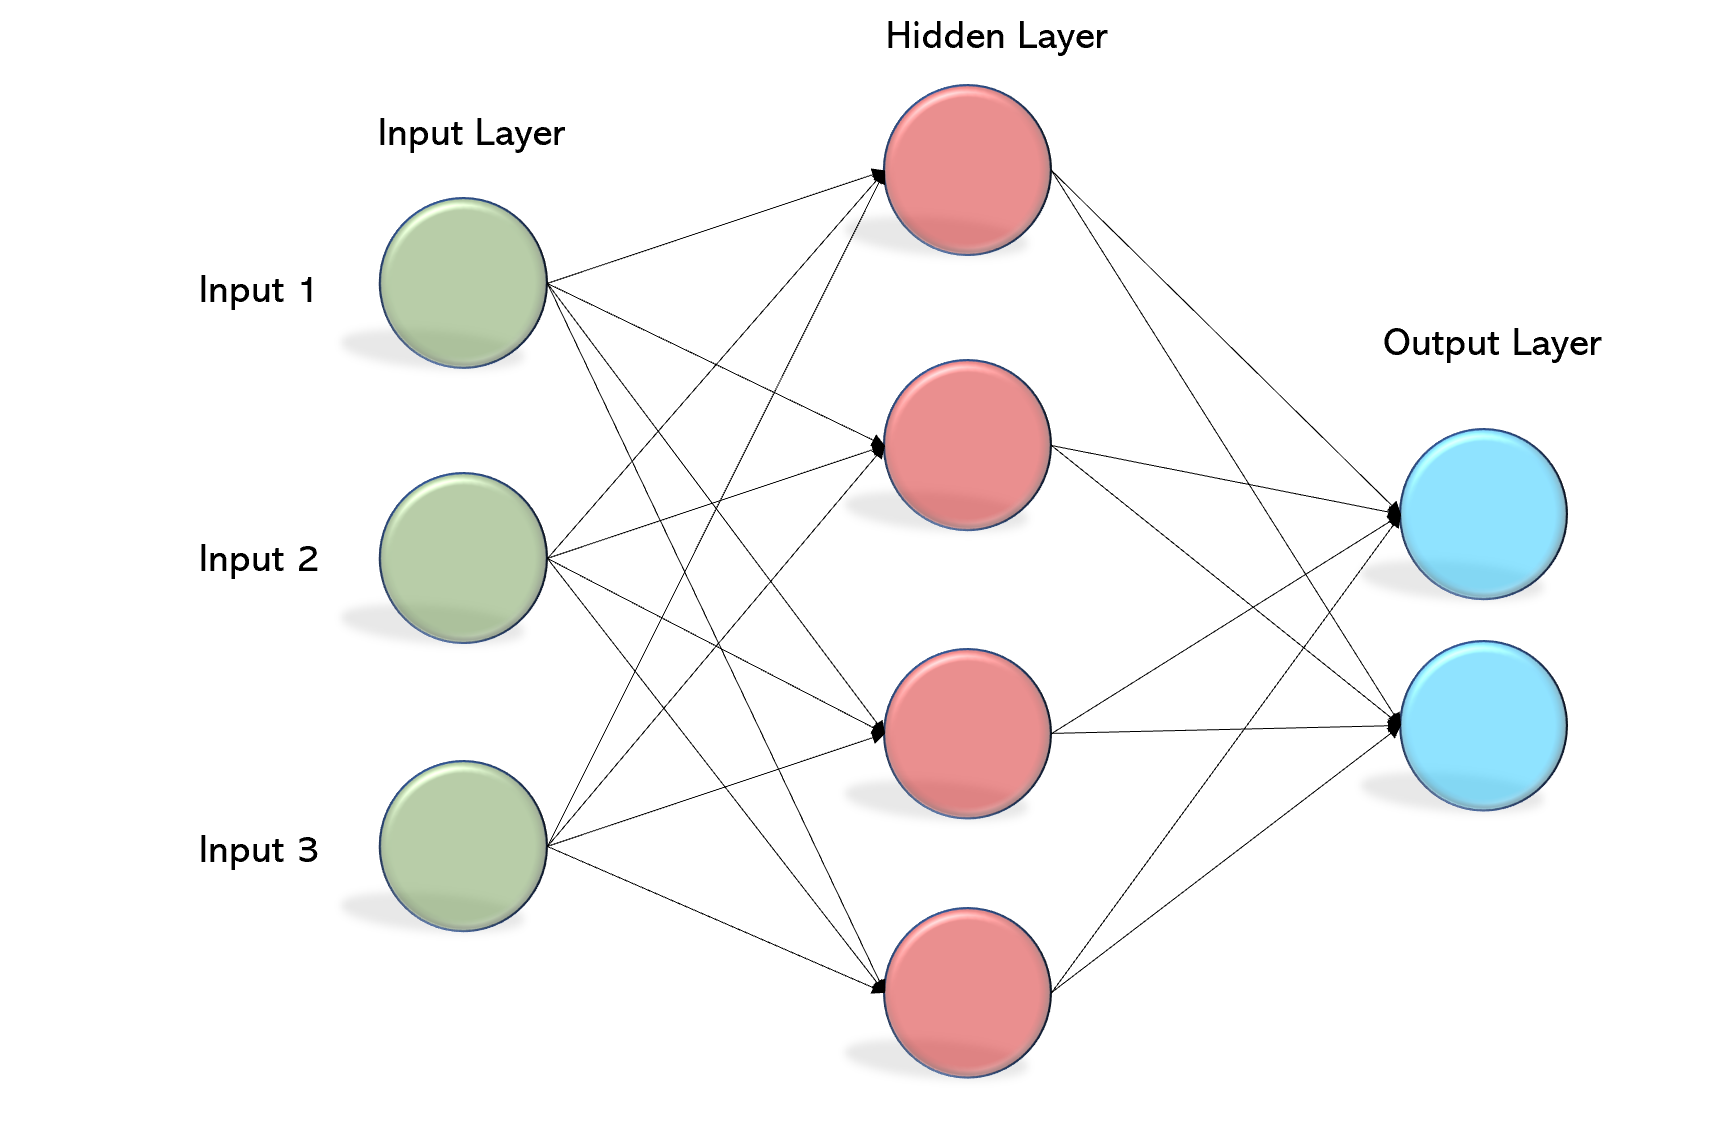

In [528]:
from IPython.display import Image
Image("imagens/11-ANN-MLP.png")

?? place better

# ANN > Feed-forward class calculation

- Calculating each $Z_m$ hidden node value from inputs $X$ ($M$ hidden nodes)

$$ Z_m = \sigma ( \alpha_{0m} + \alpha_m X) , m = 1 , . . . , M $$


- And then the output layer node from the $Z$

$$ Y =\sigma_{out}(\beta_{0} + \beta Z)$$


- $\sigma~$ is the **internal** activation function
    - Not necessarily the same in all nodes


- $\sigma_{out}~$ is the **output** activation function


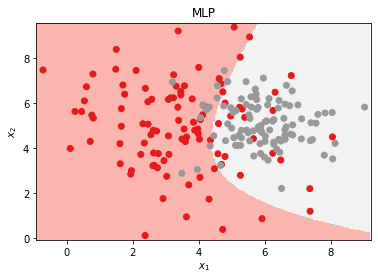

In [539]:
from sklearn.neural_network import MLPClassifier as MLP

model=MLP(hidden_layer_sizes=(32,),max_iter=2000,activation='logistic').fit(X,y)

plot_classifier_boundary(model,X)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_fg)
plt.title('MLP')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

In [540]:
def mlp_show(model):
    print("n inputs :",model.n_features_in_)
    for i in range(model.n_layers_-2):
        print("n hidden :",model.hidden_layer_sizes[i])
    print("n outputs:",model.n_outputs_)
    print("activation    :",model.activation)
    print("activation_out:",model.out_activation_)
    print("solver        :", model.solver)
    print("loss          :", model.loss)

mlp_show(model)

n inputs : 2
n hidden : 32
n outputs: 1
activation    : logistic
activation_out: logistic
solver        : adam
loss          : log_loss


# Non linear boundary approximation

- Single layer + non-linear activation function
    - **Linear boundary**
    
    
- Multiple layers + non-linear activation function
    - **Non-linear boundary**
    
    
- How well can MLP fit a boundary?
    - MLP can be **very expressive**
    - **Complexity**
       - Layers and hidden units
    - **Problems**
        - Overfitting
        - Computational time (large number of parameters)
    - Activation function
        - very important
    
    
- **Example:** layers and hidden units
    - Non-linear boundary 

0.9996 seconds
n inputs : 2
n hidden : 32
n outputs: 1
activation    : logistic
activation_out: logistic
solver        : adam
loss          : log_loss


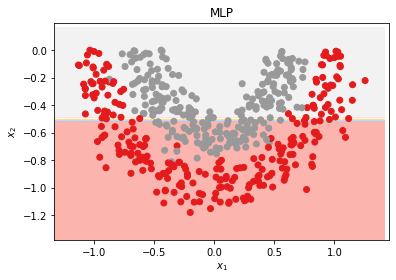

In [543]:
import time

from sklearn.datasets import make_circles

X, y = make_circles(1000, factor=0.6, noise=.1, random_state=0)

y=y[X[:,1]<0]
X=X[X[:,1]<0,:]

start = time.time()
model=MLP(hidden_layer_sizes=(32,),max_iter=10000, activation='logistic').fit(X,y)
end = time.time()

time_taken = end - start

plot_classifier_boundary(model,X)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_fg)
plt.title('MLP')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(np.round(time_taken,4), "seconds")
mlp_show(model)

# Activation functions

- Activation function
    - Can make learning harder or easier
    - Can be different for each node
        - Typically the same for each layer or the whole net


- **Logistic**
    - $f(x) = 1 / (1 + exp(-x))$
    - ranges between $0$ and $1$
    - A **classic** ANN activation function
    - Used in Logistic Regression
    - Also called **sigmoid**

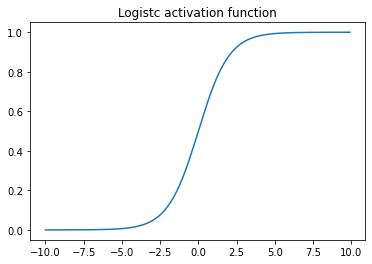

In [507]:
inx = np.arange(-10,10,.1)
out =  list(map(lambda x: 1 / (1 + np.exp(-x)), inx))
plt.plot(inx,out)
plt.title("Logistc activation function");

# Activation functions > tanh

- **Hyperbolic tangent - tanh**
    - $f(x) = tanh(x)$
    - Shape similar to logistic
        - It is also a *sigmoid*
    - **Ranges** between $-1$ and $1$
    - Often prefered to logistic 
    - Introduces **negative values**
        - The hidden layers output $+$ and $-$ values
        - Logistic only produces $+$ values
        - Easier to adjust
    - Has more **expressive gradients**
        - Higher value of derivative

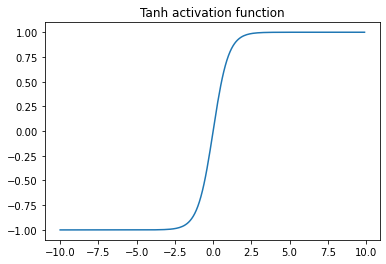

In [508]:
inx = np.arange(-10,10,.1)
out =  list(map(lambda x: np.tanh(x), inx))
plt.plot(inx,out)
plt.title("Tanh activation function");

# Activation functions > tanh

- The concentric arcs examples
    - Works with a small number of hidden nodes

2.9091 seconds
n inputs : 2
n hidden : 100
n outputs: 1
activation    : tanh
activation_out: logistic
solver        : adam
loss          : log_loss


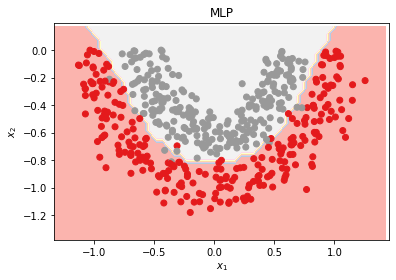

In [555]:
X, y = make_circles(1000, factor=0.6, noise=.1, random_state=0)

y=y[X[:,1]<0]
X=X[X[:,1]<0,:]

start = time.time()
model=MLP(hidden_layer_sizes=(100,),max_iter=10000, activation='tanh').fit(X,y)
end = time.time()

time_taken = end - start

plot_classifier_boundary(model,X)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_fg)
plt.title('MLP')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(np.round(time_taken,4), "seconds")
mlp_show(model)

# Other hyperparameters are important too

- **Learning rate**
    - Optimizers (solvers) can have **dynamic** learning rates
        - In `MLPclassifier` l.r. is **constant** by default
    - We determine **initial learning rate**
        - Hard to determine
        - Depends on other hyperparameters (e.g. activation function)
        - In `MLPclassifier` l.r. is **0.001** by default


- **Example**:
    - Concentric arcs can be solved with logistic activation
    - But it is very sensitive to initial learning rate
    - Try: <tanh,0.001>,increase i.l.r
    - Try: <logistic,0.001>,increase i.l.r

0.2155 seconds
n inputs : 2
n hidden : 32
n outputs: 1
activation    : logistic
activation_out: logistic
solver        : adam
loss          : log_loss


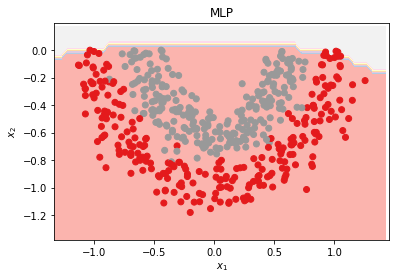

In [574]:
X, y = make_circles(1000, factor=0.6, noise=.1, random_state=0)

y=y[X[:,1]<0]
X=X[X[:,1]<0,:]

start = time.time()
model=MLP(hidden_layer_sizes=(32,),max_iter=10000, activation='logistic',learning_rate_init=0.001).fit(X,y)
end = time.time()

time_taken = end - start

plot_classifier_boundary(model,X)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_fg)
plt.title('MLP')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(np.round(time_taken,4), "seconds")
mlp_show(model)

# Full circles example

- Tanh sorts it out
    - Try with 1 layer (16; 100)
        - It works fine with one layer of 16
    - Try with 2 layers
        - It is unstable with 1 layer of 100
    - Try with Logistic 
        - Different i.l.r
        - Different hidden layers

0.3531 seconds
n inputs : 2
n hidden : 32
n hidden : 16
n outputs: 1
activation    : logistic
activation_out: logistic
solver        : adam
loss          : log_loss


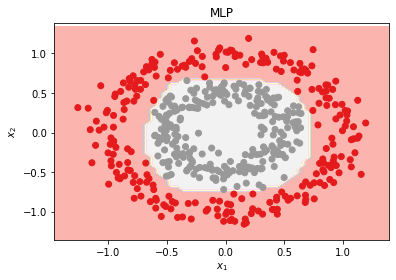

In [511]:
X, y = make_circles(500, factor=0.5, noise=.1, random_state=0)

start = time.time()
model=MLP(hidden_layer_sizes=(32,16,),max_iter=10000,activation='logistic',
          learning_rate_init=0.1).fit(X,y)
end = time.time()

time_taken = end - start

plot_classifier_boundary(model,X)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_fg)
plt.title('MLP')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(np.round(time_taken,4), "seconds")
mlp_show(model)

# Activation functions > Identity and Relu

- **Identity**
    - $f(x) = x$
    - It is a **linear function**
        - Only produces linear boundaries
    - Not usually very useful for classification
- **Relu**
    - $f(x) = max(0,x)$
    - Surprisingly effective
        - Approximates non-linear boundaries
    - Easy to manage



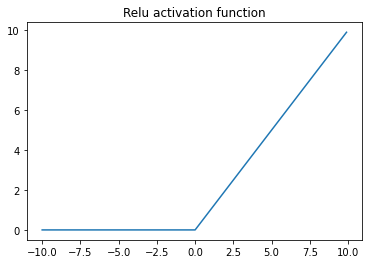

In [512]:
inx = np.arange(-10,10,.1)
out =  list(map(lambda x: max(0,x), inx))
plt.plot(inx,out)
plt.title("Relu activation function");

0.1407 seconds
n inputs : 2
n hidden : 100
n outputs: 1
activation    : relu
activation_out: logistic
solver        : adam
loss          : log_loss


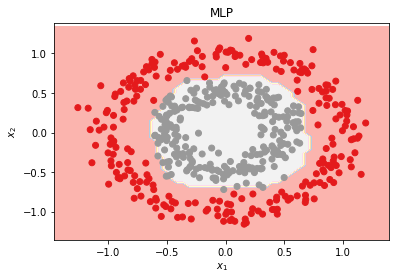

In [513]:
X, y = make_circles(500, factor=0.5, noise=.1, random_state=0)

start = time.time()
model=MLP(hidden_layer_sizes=(100,),max_iter=10000,activation='relu',
          learning_rate_init=0.1).fit(X,y)
end = time.time()

time_taken = end - start

plot_classifier_boundary(model,X)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_fg)
plt.title('MLP')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(np.round(time_taken,4), "seconds")
mlp_show(model)

# Summary so far

 * We applied ANN to non linear classification problems
 * Perceptron: **linear model**
 * Hidden layer with more than 1 node and non-linear activation: **non-linear model**
    - Known as Multy-layer Perceptron (**MLP**) 
 

# Multiple classes

- MLP **extends well** to multiple classes


- $K$-class classification
    * $K$ output nodes
    * Each models the "probability" of one class
        - It can correspond to probablities or scores
    * $K$ $0-1$ target variables (one-hot)
    
    
- **Example** with 3 classes
    - Class A is represented by $<1,0,0>$
    - Class B is represented by $<0,1,0>$
    - Class C is represented by $<0,0,1>$


0.369 seconds
n inputs : 2
n hidden : 8
n outputs: 3
activation    : logistic
activation_out: softmax
solver        : adam
loss          : log_loss


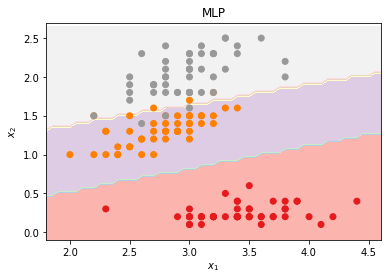

In [514]:
from sklearn.datasets import load_iris

data = load_iris()

X=data.data[:,[1,3]]
y=data.target

model=MLP(hidden_layer_sizes=(8,),max_iter=10000,activation='logistic',
          learning_rate_init=0.1).fit(X,y)
end = time.time()

time_taken = end - start
plot_classifier_boundary(model,X)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_fg)
plt.title('MLP')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(np.round(time_taken,4), "seconds")
mlp_show(model)

# Multiple classes > Softmax

- **Softmax**
    - Activation function for classification
    - One node per class
    - Transforms outputs into a probability distribution


$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_i{e^{z_i}}}
$$

- **Example** for 3 classes
    - Output is $<0.3, 0.4, -0.1>$
    - Softmax gives $<0.36029662, 0.39818934, 0.24151404>$

# ANN > Feed-forward class calculation

- Calculating each $Z_m$ hidden node value from inputs $X$ ($M$ hidden nodes)

$$ Z_m = \sigma ( \alpha_{0m} + \alpha_m X) , m = 1 , . . . , M $$


- And then each output layer node from the $Z$

$$ O_k =\beta_{0k} + \beta_k Z, k=1,...,K$$

$$ f_k(X) = g_k(O) $$


- $\sigma~$ is the activation function
    - Not necessarily the same in all nodes


- $g_k$ transforms the output to a more adequate form
  - The *softmax* function produces positive values that sum to 1


In [515]:
z= [0.3, 0.4, -0.1]
softmax = np.exp(z)/sum(np.exp(z))
softmax;

In [516]:
# Get probabilities of one case
i=70
print("Probabilities for case", i, model.predict_proba(X[(i-1):i,:]))

Probabilities for case 70 [[0.00337763 0.99521394 0.00140843]]


# MLP for regression

- The MLP is naturally extended to regression as well
    - The output is one single neuron
    - Output activation function is **identity**
    
    
- **Example**: the Boston dataset
    - Predict house prices
    - Try with different activation functions

n inputs : 13
n hidden : 4
n outputs: 1
activation    : relu
activation_out: identity
solver        : adam
loss          : squared_loss


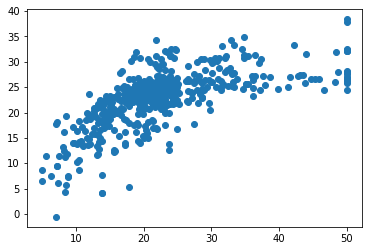

In [517]:
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.datasets import load_boston

data=load_boston()

X=data.data
y=data.target

model=MLPR(hidden_layer_sizes=(4,),max_iter=10000,activation='relu',
          learning_rate_init=0.01).fit(X,y)
mlp_show(model)

plt.scatter(y,model.predict(X));

# Error analysis

- Examine the training loss curve
    - Gives an idea of the convergence


- Cross validation
    - Estimate generalization error
    - This is what really matters

Best loss: 23.493769557645688


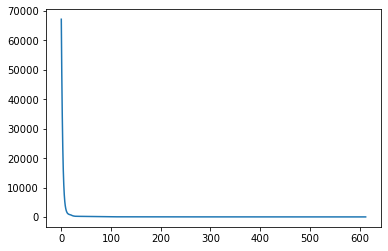

In [518]:
plt.plot(model.loss_curve_)
print("Best loss:",model.best_loss_)

In [519]:
from sklearn.model_selection import cross_val_score

val=-cross_val_score(model,X,y,scoring='neg_root_mean_squared_error',cv=5)
print("RMSE",np.mean(val))

RMSE 9.306302728349284


# Normalization / Standardization

- Normalize / Standardize the input data
    - Faster convergence
    - Better results
    
    
- Standard sclaler
    - Divide by variance
    - Subtract by mean

In [520]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
Xst=scaler.transform(X)

model=MLPR(hidden_layer_sizes=(32,),max_iter=10000,activation='relu',
          learning_rate_init=0.01)
val=-cross_val_score(model,Xst,y,scoring='neg_root_mean_squared_error',cv=5)
print("RMSE",np.mean(val))

RMSE 5.004311724105534


# References

**The Problem of Induction** Wikipedia, the free encyclopedia, 2021.

**The Logic of Scientific Discovery** Karl Popper, 1934.

**Efficient Back Prop** Yann LeCun et al., http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

**Neural network models**, Sklearn documentation, https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network

**The Elements of Statistical Learning**
Trevor Hastie, Robert Tibshirani, Jerome Friedman
Springer. (mostly chapter 12, also chapter 5)
